In [6]:
# %%
import pandas as pd
import numpy as np
import helpers.potus as potus
import helpers.process as process
from helpers import io as pickle_io
import sys
import datetime
import gc

importing helper functions


In [7]:
root_folder = potus.rootFolder('potus_data')
df = pd.read_pickle(root_folder + '/speeches_df.pkl')
word_list = pickle_io.from_pickle(root_folder + '/word_list.pkl')
bigrams = pickle_io.from_pickle(root_folder + '/bigrams.pkl')

df['word_list'] = [w.split(',') for w in word_list]
df['bigrams'] = [b.split(',') for b in bigrams]
df['token_count'] = list(map(lambda s: len(s.split(',')), bigrams))
df.sort_values(by='date', ascending=True,inplace=True)

File exists and is readable
File exists and is readable


# General Descriptive Stats on POTUS dataset

In [8]:
print('speeches spanning: ', df.date.max() - df.date.min())
print(f'from: {df.date.min()} to: {df.date.max()}')

speeches spanning:  82925 days, 0:00:00
from: 1789-04-30 to: 2016-05-15


In [9]:
print(f'{len(df)} speeches by {len(df.speaker.unique())} speakers')


962 speeches by 43 speakers


In [10]:
display(df.head(2))
display(df.tail(2))

,speaker,file_name,file_path,raw_tuple,title,date,speech,speech_len,word_list,bigrams,token_count
909,washington,washington_speeches_000.txt,/home/azureuser/cloudfiles/code/data/raw/potus...,"(First Inaugural Address, 1789-04-30, Fellow C...",First Inaugural Address,1789-04-30,Fellow Citizens of the Senate and the House of...,8687,"[fellow, citizen, senate, house, representativ...","[fellow_citizen, senate_house, representative,...",595
913,washington,washington_speeches_004.txt,/home/azureuser/cloudfiles/code/data/raw/potus...,"(Thanksgiving Proclamation, 1789-10-03, Wherea...",Thanksgiving Proclamation,1789-10-03,Whereas it is the duty of all Nations to ackno...,2541,"[whereas, duty, nation, acknowledge, providenc...","[whereas, duty, nation, acknowledge, providenc...",181


,speaker,file_name,file_path,raw_tuple,title,date,speech,speech_len,word_list,bigrams,token_count
723,obama,obama_speeches_047.txt,/home/azureuser/cloudfiles/code/data/raw/potus...,"(Remarks to the People of Cuba, 2016-03-22, Th...",Remarks to the People of Cuba,2016-03-22,Thank you. <Applause.> Muchas gracias. Thank y...,23524,"[thank, applause, muchas, gracias, thank, much...","[thank_applause, muchas, gracias, thank_much, ...",1734
725,obama,obama_speeches_049.txt,/home/azureuser/cloudfiles/code/data/raw/potus...,"(Commencement Address at Rutgers University, 2...",Commencement Address at Rutgers University,2016-05-15,Hello Rutgers! <Applause.> R-U rah-rah! <Appla...,28940,"[hello, rutgers, applause, applause, thank, mu...","[hello, rutgers, applause, applause_thank, muc...",2145


count      962.000000
mean      1603.212058
std       1721.030330
min         51.000000
25%        475.250000
50%       1084.000000
75%       1945.500000
max      12798.000000
Name: token_count, dtype: float64

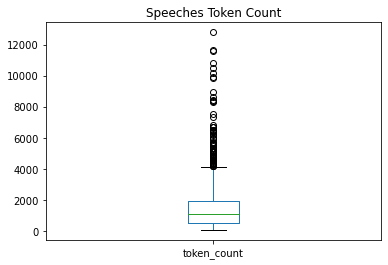

In [12]:
df.token_count.plot.box(title='Speeches Token Count')
df.token_count.describe()

In [13]:
speakers = df.speaker.unique()
print(df.speaker.unique())
print(df.speaker.nunique())
display(df.speaker.value_counts())

['washington' 'adams' 'jefferson' 'madison' 'monroe' 'jqadams' 'jackson'
 'vanburen' 'harrison' 'tyler' 'polk' 'taylor' 'fillmore' 'lincoln'
 'pierce' 'buchanan' 'johnson' 'grant' 'hayes' 'garfield' 'arthur'
 'cleveland' 'bharrison' 'mckinley' 'roosevelt' 'taft' 'wilson' 'harding'
 'coolidge' 'hoover' 'fdroosevelt' 'truman' 'nixon' 'eisenhower' 'kennedy'
 'lbjohnson' 'reagan' 'ford' 'carter' 'bush' 'clinton' 'gwbush' 'obama']
43


lbjohnson      71
reagan         59
fdroosevelt    49
obama          48
kennedy        45
clinton        39
gwbush         39
grant          32
wilson         32
cleveland      31
johnson        31
hoover         29
jackson        26
polk           25
jefferson      24
nixon          23
bush           23
madison        22
carter         22
roosevelt      22
washington     21
truman         19
harding        18
tyler          18
bharrison      16
hayes          16
pierce         15
lincoln        15
ford           14
mckinley       14
buchanan       14
coolidge       12
taft           11
arthur         11
monroe         10
vanburen       10
adams           9
jqadams         8
fillmore        7
eisenhower      6
taylor          4
garfield        1
harrison        1
Name: speaker, dtype: int64

,date_min,date_max,date_duration,token_count_sum,token_count_mean,token_count_std,token_count_min,token_count_max,speaker_speeches_count,days,months,years
speaker,,,,,,,,,,,,
adams,1797-03-04,1800-11-22,1358 days,6046,671.777778,353.271771,126,1256,9,1358,45.0,4.0
arthur,1881-09-22,1981-12-06,36599 days,21210,1928.181818,1987.841685,121,5587,11,36599,1202.0,100.0
bharrison,1889-03-04,1893-02-15,1444 days,31778,1986.125000,2382.177292,78,6693,16,1444,47.0,4.0
buchanan,1857-03-04,1861-03-01,1458 days,33319,2379.928571,2347.538530,223,6721,14,1458,48.0,4.0
bush,1988-08-18,1993-01-05,1601 days,40464,1759.304348,1641.308664,343,6242,23,1601,53.0,4.0


count       43.000000
mean     35867.209302
std      24392.887870
min       1253.000000
25%      16126.000000
50%      32336.000000
75%      45682.500000
max      99298.000000
Name: token_count_sum, dtype: float64

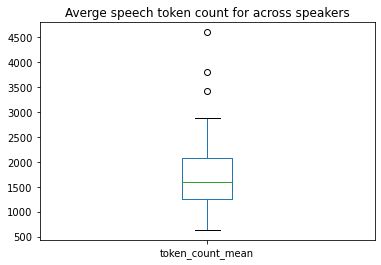

In [14]:
byspeaker_df = df.groupby('speaker').agg(
    {
        'date': ['min', 'max', ('duration', lambda d: max(d) - min(d))],
        'token_count': [sum, 'mean', 'std', min, max],
        'speaker': [('speeches_count', 'count')]
    }
)

flatten_column_names = ['_'.join(col).strip('_') for col in byspeaker_df.columns]
byspeaker_df.columns = flatten_column_names
byspeaker_df['days'] = byspeaker_df.date_duration.dt.days
byspeaker_df['months'] = round(byspeaker_df.date_duration / np.timedelta64(1, 'M'), 0)
byspeaker_df['years'] = round(byspeaker_df.date_duration / np.timedelta64(1, 'Y'), 0)
display(byspeaker_df.head())
display(byspeaker_df.token_count_sum.describe())
byspeaker_df.token_count_mean.plot.box(title='Averge speech token count for across speakers')

In [15]:
byspeaker_df.speaker_speeches_count.nlargest(10)

speaker
lbjohnson      71
reagan         59
fdroosevelt    49
obama          48
kennedy        45
clinton        39
gwbush         39
grant          32
wilson         32
cleveland      31
Name: speaker_speeches_count, dtype: int64

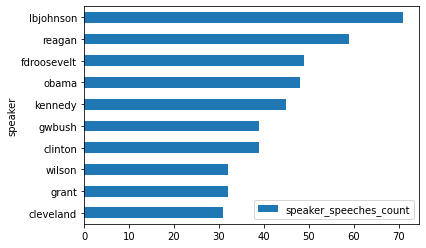

In [16]:
byspeaker_df.nlargest(10, 'speaker_speeches_count')[['speaker_speeches_count']]\
    .sort_values('speaker_speeches_count')\
    .plot.barh()

In [17]:
top_10_stats = byspeaker_df.merge(
    right=byspeaker_df.speaker_speeches_count.nlargest(10).reset_index(),
    how='inner',
    on='speaker',
    suffixes=('', '_r')
)
top_10_stats = top_10_stats[['speaker', 'date_min', 'date_max', 'years', 'speaker_speeches_count', 'token_count_sum']]\
    .sort_values('speaker_speeches_count', ascending=False)

top_10_stats['speaches_per_year'] = round(top_10_stats.speaker_speeches_count / top_10_stats.years)

display(top_10_stats)

,speaker,date_min,date_max,years,speaker_speeches_count,token_count_sum,speaches_per_year
6,lbjohnson,1963-05-30,1969-01-14,6.0,71,99298,12.0
8,reagan,1964-10-27,1989-01-11,24.0,59,89557,2.0
2,fdroosevelt,1933-03-04,1945-03-01,12.0,49,55067,4.0
7,obama,2008-08-28,2016-05-15,8.0,48,82738,6.0
5,kennedy,1960-07-15,1963-10-26,3.0,45,66554,15.0
1,clinton,1993-01-20,2001-01-18,8.0,39,62579,5.0
4,gwbush,2001-01-20,2009-01-15,8.0,39,48721,5.0
3,grant,1869-03-04,1877-01-29,8.0,32,42644,4.0
9,wilson,1913-03-04,1920-12-07,8.0,32,32361,4.0
0,cleveland,1885-03-04,1897-03-02,12.0,31,67092,3.0


             speaker_speeches_count  years
speaker                                   
arthur                           11  100.0
reagan                           59   24.0
nixon                            23   22.0
lincoln                          15   13.0
cleveland                        31   12.0
fdroosevelt                      49   12.0


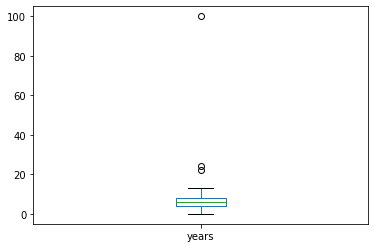

In [18]:
byspeaker_df.years.plot.box()
print(byspeaker_df[['speaker_speeches_count', 'years']].query('years > 8').sort_values('years', ascending=False))



5% of speeches contain more than 5091


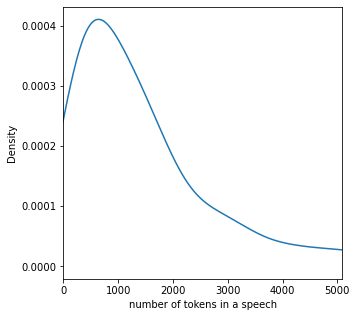

In [53]:
import matplotlib.pylab as plt
plt.figure(figsize=(5,5))

top5 = int(np.quantile(df['token_count'], 0.95))


plt.xlim(0,top5)
plt.xlabel('number of tokens in a speech')

df['token_count'].plot(kind='density')
print('5% of speeches contain more than ' + str(top5))

In [54]:
df['year'] = [d.year for d in df['date']]

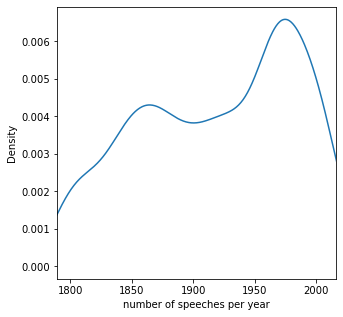

In [55]:
import matplotlib.pylab as plt
plt.figure(figsize=(5,5))
plt.xlim(1789, 2016)

plt.xlabel('number of speeches per year')

df['year'].plot(kind='density')

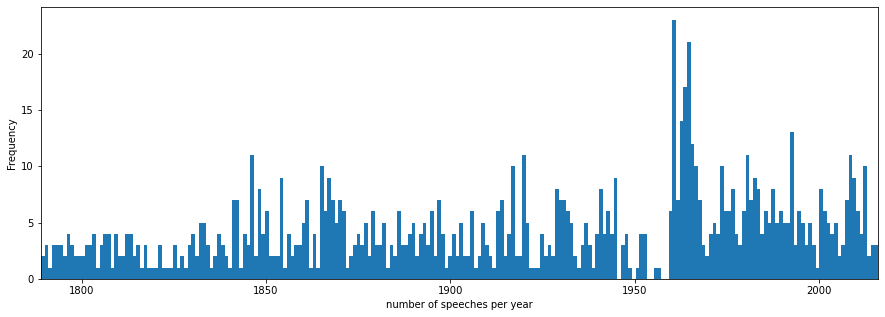

In [57]:
y = df['year']

import matplotlib.pylab as plt
plt.figure(figsize=(15,5))
minm = 1789
maxm = 2016
plt.xlim(minm,maxm)

plt.xlabel('number of speeches per year')

y.plot(kind='hist', bins=228)

In [ ]:
byspeaker_df.sort_values(by='date_min')

,date_min,date_max,date_duration,token_count_sum,token_count_mean,token_count_std,token_count_min,token_count_max,speaker_speeches_count,days,months,years
speaker,,,,,,,,,,,,
washington,1789-04-30,1796-12-07,2778 days,13284,632.571429,598.155212,52,2695,21,2778,91.0,8.0
adams,1797-03-04,1800-11-22,1358 days,6046,671.777778,353.271771,126,1256,9,1358,45.0,4.0
jefferson,1801-03-04,1809-04-03,2952 days,16401,683.375000,370.974605,101,1340,24,2952,97.0,8.0
madison,1809-03-04,1817-03-03,2921 days,14971,680.500000,444.293098,106,1386,22,2921,96.0,8.0
monroe,1817-03-04,1824-12-07,2835 days,19799,1979.900000,566.600084,1363,3267,10,2835,93.0,8.0
jqadams,1821-07-04,1828-12-02,2708 days,14557,1819.625000,1362.563963,199,3574,8,2708,89.0,7.0
jackson,1829-03-04,1837-03-04,2922 days,63072,2425.846154,1978.147915,119,6169,26,2922,96.0,8.0
vanburen,1837-03-04,1841-01-02,1400 days,26752,2675.200000,2219.490372,152,5496,10,1400,46.0,4.0
harrison,1841-03-04,1841-03-04,0 days,3413,3413.000000,NaN,3413,3413,1,0,0.0,0.0


In [94]:
len(byspeaker_df)

43